# Analyzing Portfolio Risk and Return

In this Challenge, you'll assume the role of a quantitative analyst for a FinTech investing platform. This platform aims to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality. (Think about [Wealthfront](https://www.wealthfront.com/) or [Betterment](https://www.betterment.com/)). To keep the costs low, the firm uses algorithms to build each client's portfolio. The algorithms choose from various investment styles and options.

You've been tasked with evaluating four new investment options for inclusion in the client portfolios. Legendary fund and hedge-fund managers run all four selections. (People sometimes refer to these managers as **whales**, because of the large amount of money that they manage). You’ll need to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.

## Instructions

### Import the Data

Use the ``risk_return_analysis.ipynb`` file to complete the following steps:

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

3. Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

### Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents. To do so, complete the following steps:

1. Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

3. Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, complete the following steps:

1. Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

    > **Hint** Save this new DataFrame&mdash;the one that contains the data for just the four fund portfolios. You’ll use it throughout the analysis.

3. Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta. To do so, complete the following steps:

1. Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

2. Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

3. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

5. Answer the following three questions:

* Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

* Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

* Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio. To do so, complete the following steps:

1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

#### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options. To start your analysis, complete the following step:

* Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

Next, for each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Finally, answer the following two questions:

* Which of the two portfolios seem more sensitive to movements in the S&P 500?

* Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?


### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [1]:
# Import Pandas and Numpy library
import pandas as pd
import numpy as np

# Import the Path module from the pathlib library
from pathlib import Path

# Import the matplotlib inline dependency
%matplotlib inline

#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [2]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 

funds_df = pd.read_csv(
    Path("./Resources/whale_navs.csv"), 
    index_col="date", 
    parse_dates=True, 
    infer_datetime_format=True
)

# Review the first 5 rows of the DataFrame
funds_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [3]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.
funds_daily_returns = funds_df.pct_change().dropna()
funds_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

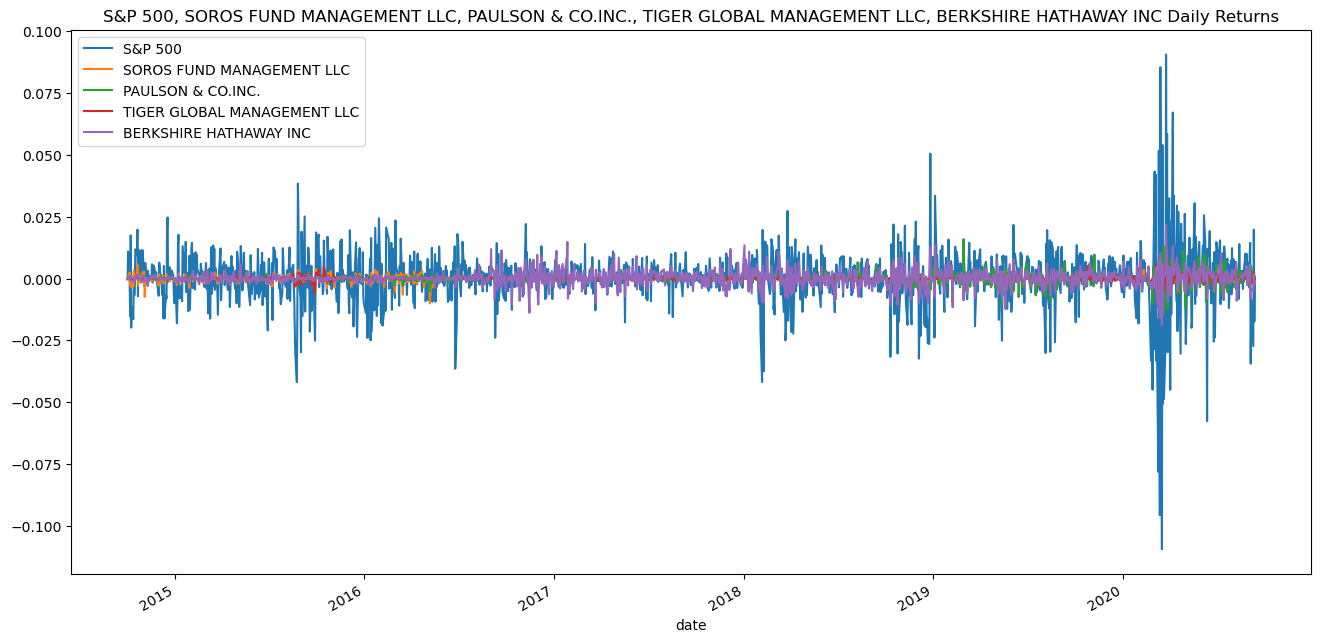

In [4]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
ax = funds_daily_returns['S&P 500'].plot(figsize=(16, 8), title='S&P 500, SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC., TIGER GLOBAL MANAGEMENT LLC, BERKSHIRE HATHAWAY INC Daily Returns')
funds_daily_returns['SOROS FUND MANAGEMENT LLC'].plot(ax=ax)
funds_daily_returns['PAULSON & CO.INC.'].plot(ax=ax)
funds_daily_returns['TIGER GLOBAL MANAGEMENT LLC'].plot(ax=ax)
funds_daily_returns['BERKSHIRE HATHAWAY INC'].plot(ax=ax)

# Set the legend for the visualization
ax.legend(["S&P 500", "SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'])

```Observation 1:``` based on the daily returns graph S&P 500 seems to be significantly more volatile especially in 2020 and onwards

#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [5]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
funds_cumulative_returns =  (1 + funds_daily_returns).cumprod()
funds_cumulative_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

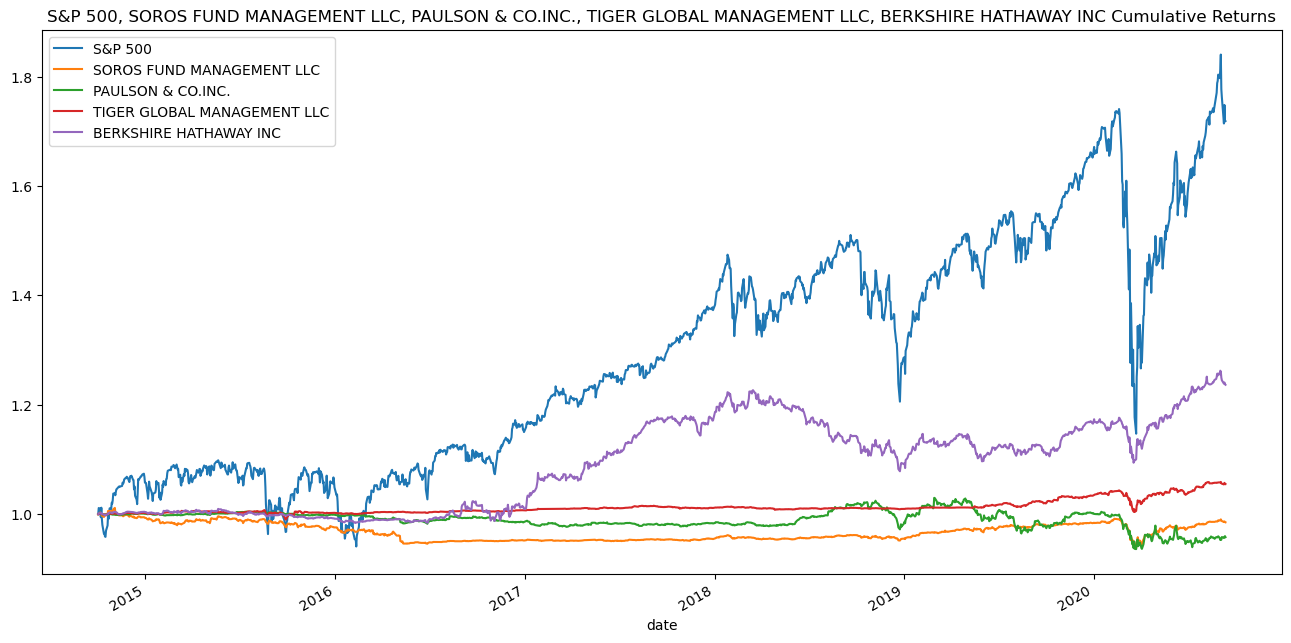

In [6]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
ax = funds_cumulative_returns['S&P 500'].plot(figsize=(16, 8), title='S&P 500, SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC., TIGER GLOBAL MANAGEMENT LLC, BERKSHIRE HATHAWAY INC Cumulative Returns')
funds_cumulative_returns['SOROS FUND MANAGEMENT LLC'].plot(ax=ax)
funds_cumulative_returns['PAULSON & CO.INC.'].plot(ax=ax)
funds_cumulative_returns['TIGER GLOBAL MANAGEMENT LLC'].plot(ax=ax)
funds_cumulative_returns['BERKSHIRE HATHAWAY INC'].plot(ax=ax)

# Set the legend for the visualization
ax.legend(["S&P 500", "SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'])


#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** # ```Observation 2```: there were short periods of time around 2015 and 2016 when the cumulative returns of the funds exceeded those of S&P 500. However, since Q2 2016 and until the end of the sample period S&P 500 outperformed all the funds.

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Box Plot of Daily Returns  - 4 Funds and S&P 500'}>

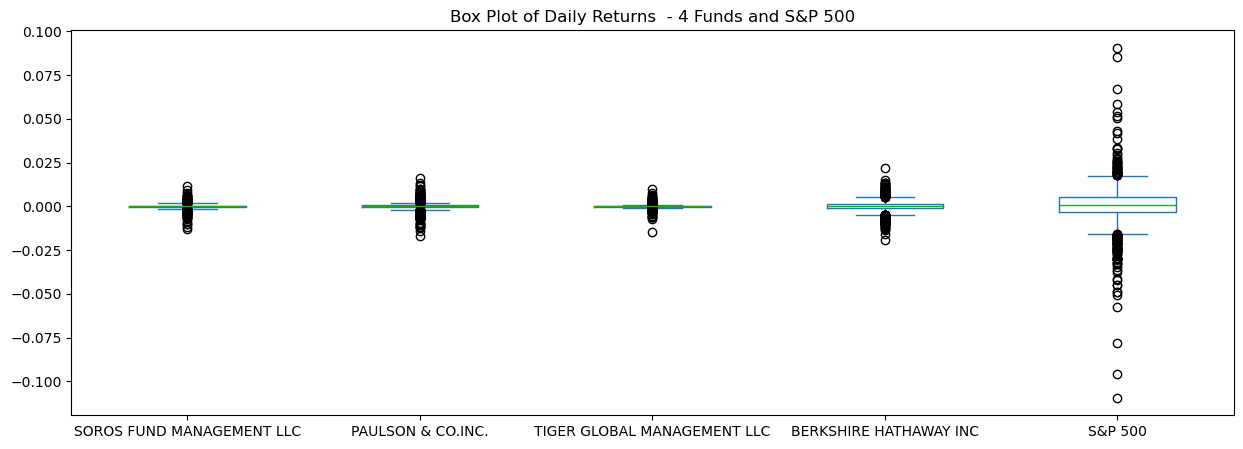

In [7]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
funds_daily_returns.plot.box(title = 'Box Plot of Daily Returns  - 4 Funds and S&P 500', figsize = (15, 5))


```Observation 3:``` The box plot of daily returns (the box size, the spread of the whiskers and the number of outliers) confirms Observation 1 suggesting that S&P 500 daily retruns were significantly more volatile than those of the funds. Out of four funds, Berkshire daily returns seem to be the most volatile, followed by Paulson. Tiger appears to exhibit the smallest volatility.

#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Box Plot of Daily Returns  - 4 Funds excl. S&P 500'}>

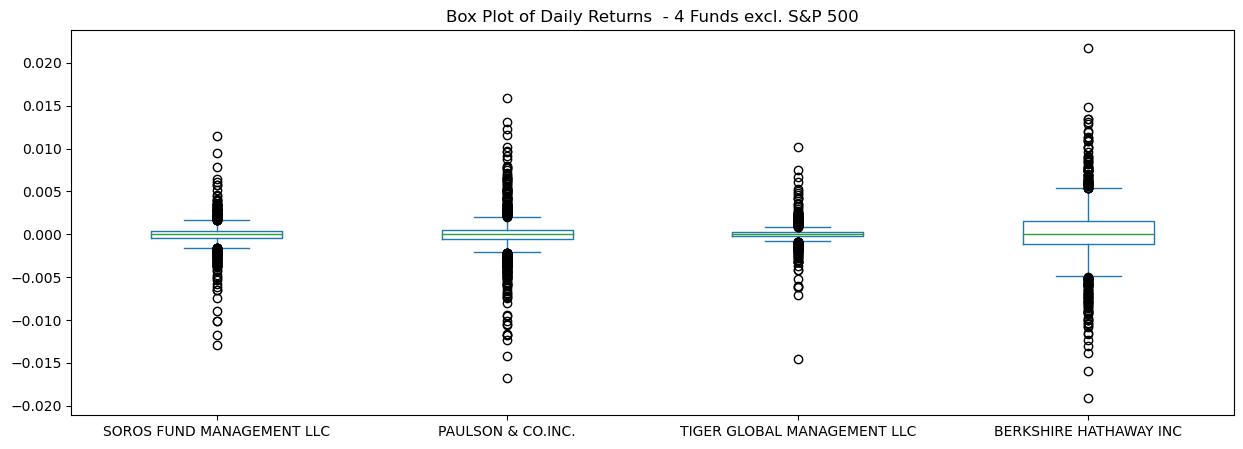

In [8]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
four_funds_daily_returns = funds_daily_returns.drop(columns=['S&P 500'])

four_funds_daily_returns.plot.box(title = 'Box Plot of Daily Returns  - 4 Funds excl. S&P 500', figsize = (15, 5))

#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** Judging by the the box size, the spread of the whiskers and the number snd spread of the outliers, out of four funds, Berkshire daily returns seem to be the most volatile, followed by Paulson. Tiger appears to exhibit the smallest volatility.

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [9]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
standard_deviation = funds_daily_returns.std()
standard_deviation_sorted = standard_deviation.sort_values()
standard_deviation_sorted

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [10]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
trading_days = 252
annualized_standard_deviation = standard_deviation * np.sqrt(trading_days)
annualized_standard_deviation_sorted = annualized_standard_deviation.sort_values()
annualized_standard_deviation_sorted

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

```Observation 4```: annualized std of S&P 500 and the four funds confirm Observation 3: S&P 500 was the most volatile during the reporting period, followed by Berkshire and Paulson. Tiger was the least volatile.

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

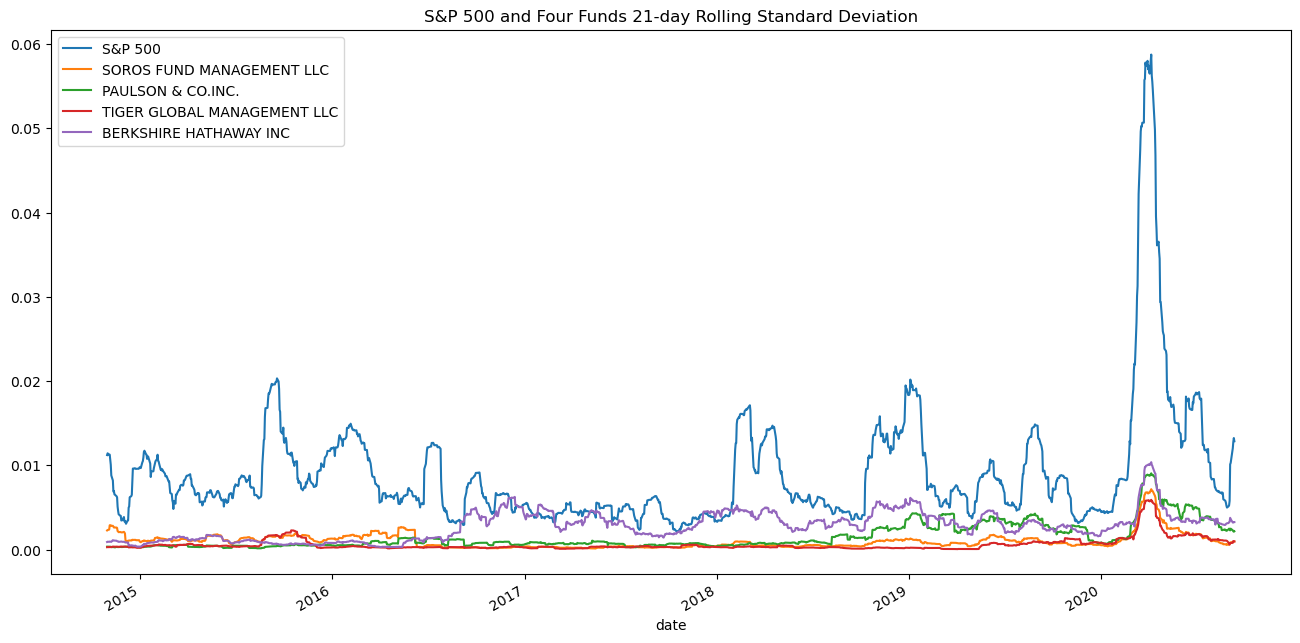

In [11]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
ax = funds_daily_returns['S&P 500'].rolling(window=21).std().plot(figsize=(16, 8), title='S&P 500 and Four Funds 21-day Rolling Standard Deviation')
funds_daily_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=21).std().plot(ax=ax)
funds_daily_returns['PAULSON & CO.INC.'].rolling(window=21).std().plot(ax=ax)
funds_daily_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=21).std().plot(ax=ax)
funds_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).std().plot(ax=ax)

# Set the legend for the visualization
ax.legend(["S&P 500", "SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'])

#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

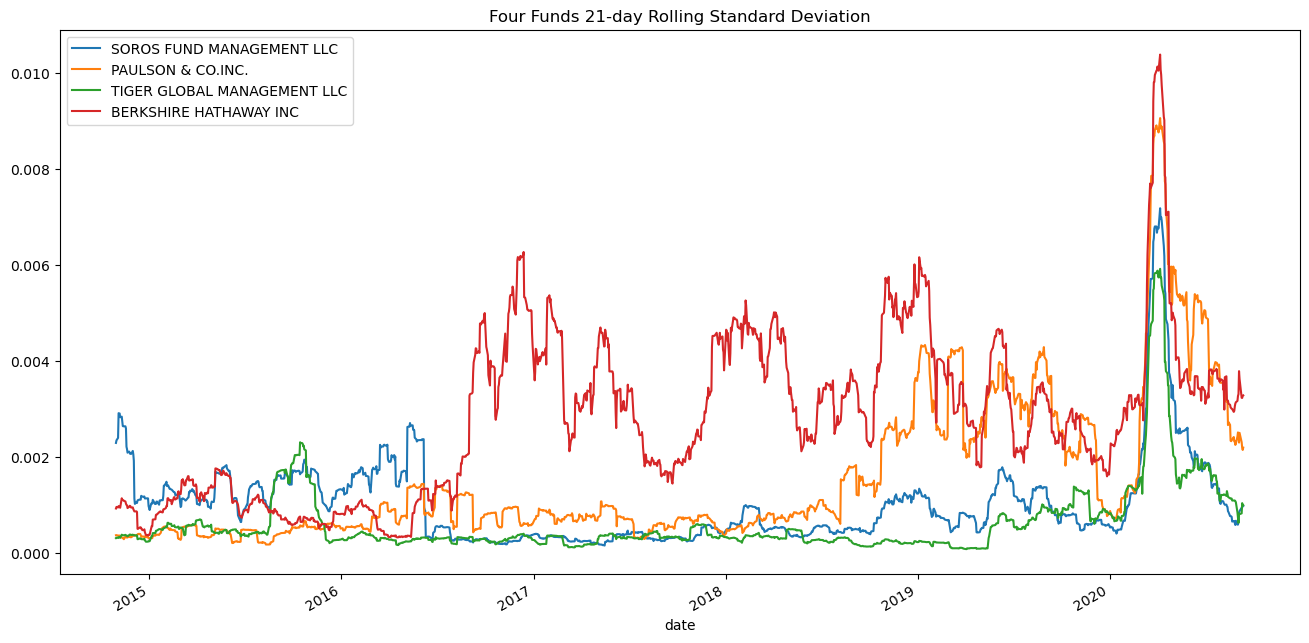

In [12]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
ax = funds_daily_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=21).std().plot(figsize=(16, 8), title='Four Funds 21-day Rolling Standard Deviation')
funds_daily_returns['PAULSON & CO.INC.'].rolling(window=21).std().plot(ax=ax)
funds_daily_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=21).std().plot(ax=ax)
funds_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).std().plot(ax=ax)

# Set the legend for the visualization
ax.legend(["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'])


#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** There is no fund that shows higher annualized standard deviation than S&P 500. Also from the 21-day rolling standard deviation we can conclude that S&P 500 is the riskiest out of five based on the annualized standard deviation

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** # Throught the sample period funds showed a different degree of alignment with S&P 500. All funds were increasingly aligned with S&P 500 in 2020. Berkshire appears to be most aligned with S&P 500, particularly in the period 2017-2020. The fund has a significant weight (fifth now) in S&P 500, and its large possession of Apple (largest weight in S&P 500) and Coca Cola (within largest 25 contributors) can serve as an explanation of such an alignment.


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** # Up until mid 2016 Soros fund seemed to be the riskiest, with Tiger taking over for a short period in 2015. As of the mid 2016 and until the end of the sample period Berkshire was definitly the riskiest of four.

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [13]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
average_annual_funds_daily_returns = funds_daily_returns.mean()*trading_days
average_annual_funds_daily_returns_sorted = average_annual_funds_daily_returns.sort_values()
average_annual_funds_daily_returns_sorted

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [14]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
sharpe_ratio = average_annual_funds_daily_returns / annualized_standard_deviation
sharpe_ratio_sorted = sharpe_ratio.sort_values()
sharpe_ratio_sorted

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':' Sharpe ratios for the four funds and for the S&P 500'}>

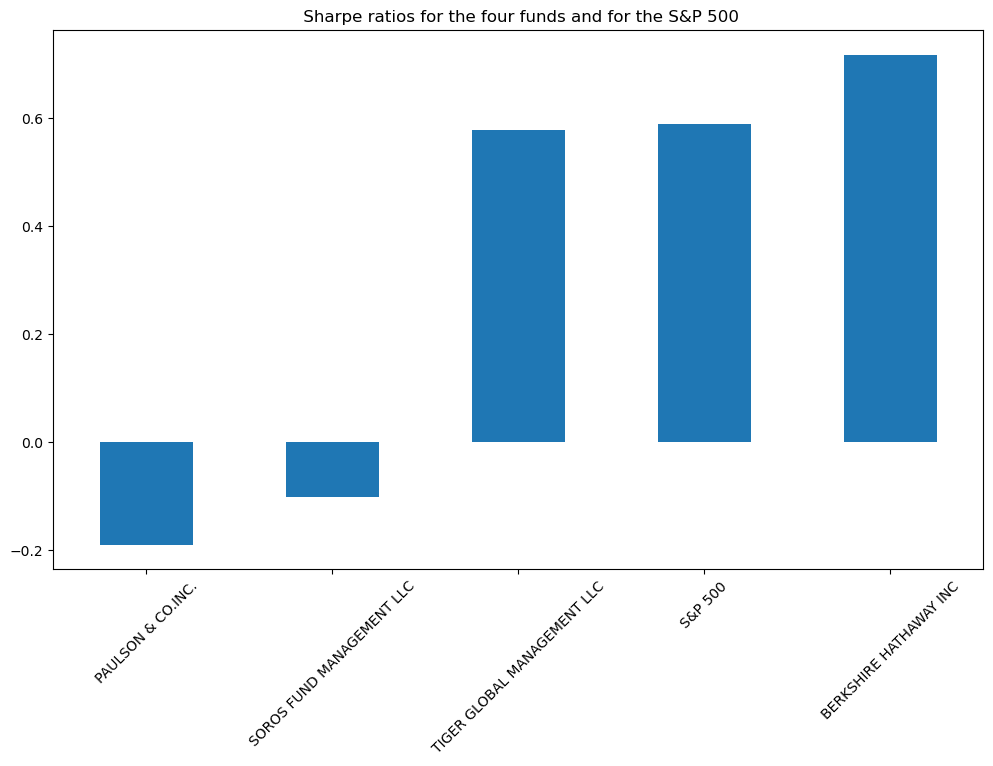

In [15]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
sharpe_ratio_sorted.plot.bar(title = ' Sharpe ratios for the four funds and for the S&P 500', figsize = (12, 7), rot = 45)


#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** # Berkshire with Sarpe Ratio of 0.72 offered the best risk-retrun profile for the selected time period, while Paulson had the worst risk-return with a negative Sharpe ratio of -0.19

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

> Risk-return conclusion: based on the risk-return analyses conducted above at this point I recommend **Berkshire** and **Tiger** as an investment option

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [36]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
SP_variance_60d_window = funds_daily_returns['S&P 500'].rolling(window=60).var()
SP_variance_60d_window.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [37]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
berkshire_covariance_60d_window = funds_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(funds_daily_returns['S&P 500'])
berkshire_covariance_60d_window.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [38]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
berkshire_beta_60d_window = berkshire_covariance_60d_window / SP_variance_60d_window
berkshire_beta_60d_window.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [39]:
# Calculate the average of the 60-day rolling beta
berkshire_beta_mean = berkshire_beta_60d_window.mean()
berkshire_beta_mean

0.2214986101354593

##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Berkshire 60-day Rolling Beta'}, xlabel='date'>

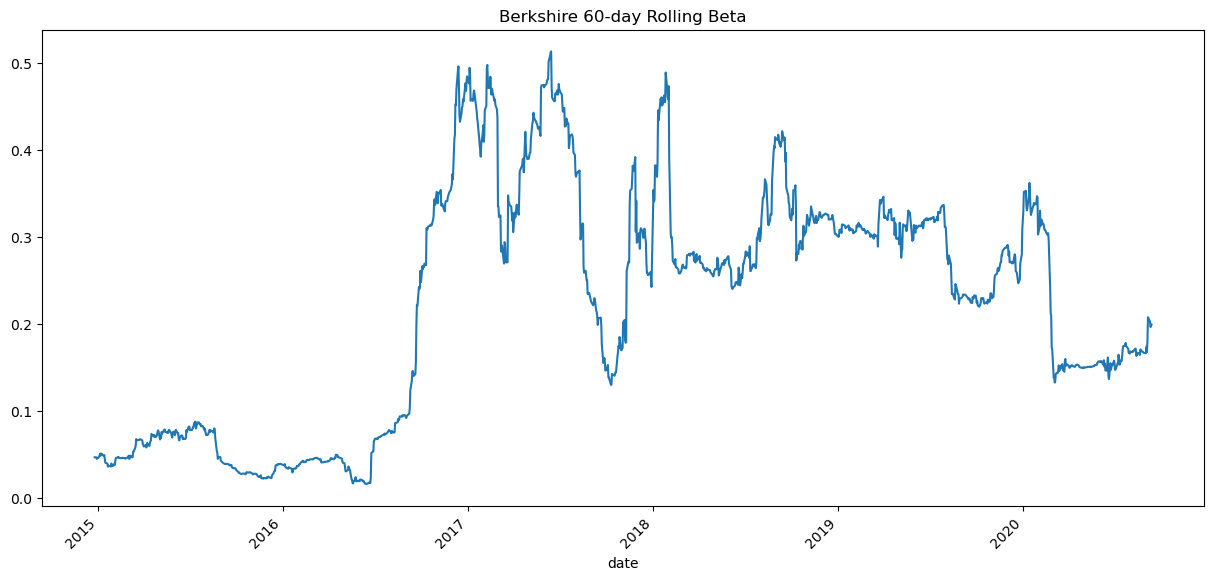

In [40]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
berkshire_beta_60d_window.plot(title = 'Berkshire 60-day Rolling Beta', figsize = (15, 7), rot = 45)

##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [41]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
tiger_covariance_60d_window = funds_daily_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(funds_daily_returns['S&P 500'])
tiger_covariance_60d_window.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [42]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
tiger_beta_60d_window = tiger_covariance_60d_window / SP_variance_60d_window
tiger_beta_60d_window.tail()

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [43]:
# Calculate the average of the 60-day rolling beta
tiger_beta_mean = tiger_beta_60d_window.mean()
tiger_beta_mean

0.03093001487238774

##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Tiger 60-day Rolling Beta'}, xlabel='date'>

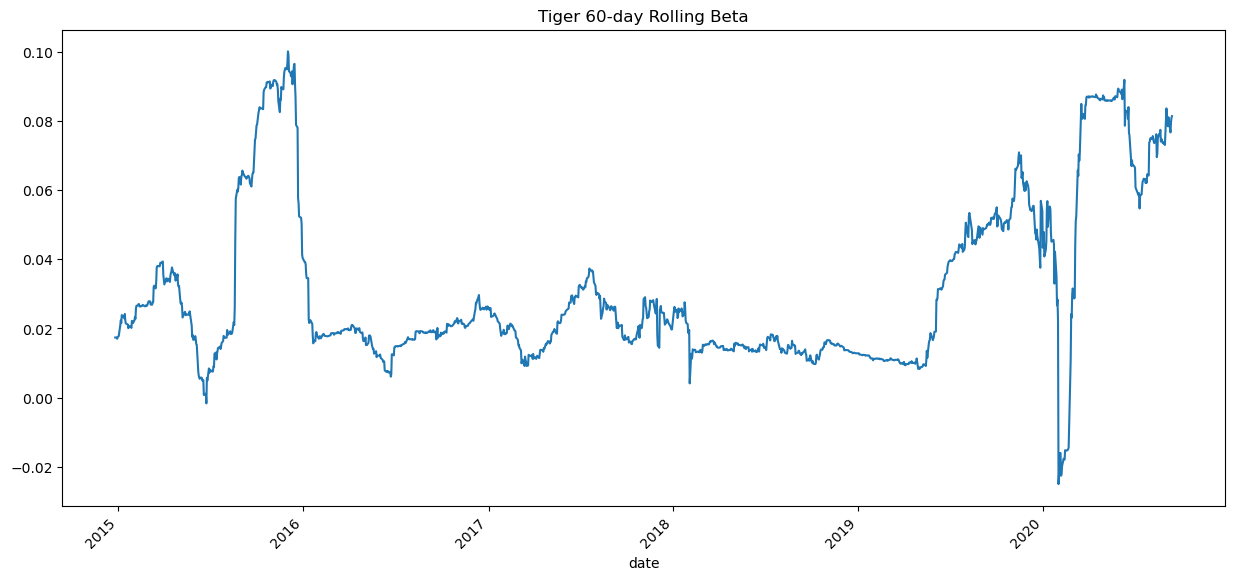

In [44]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
tiger_beta_60d_window.plot(title = 'Tiger 60-day Rolling Beta', figsize = (15, 7), rot = 45)

#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** When examining the 60-day rolling beta of Berkshire and Tiger we can conclude that Berkshire is more sensitive to the movement in the S&P with the average rolling beta of 0.22 vs Tigers average rolling beta of 0.031. One of the possible explanations beein a large weight of berkshire within S&P index.


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** With such low beta and very low annualized standard deviation Tiger proves to be both a low risk fund and a great diversifier, particularly during economic downturns. However, its inferior returns (the fund returned a cummulative 5.5% to its investors during the selected period of Oct-2014 - Sep-2020 comparing to the 23.7% cummulative returns of Berkshire) do not offer greate investment potential to the fund investors.
Berkshire, on the other hand, proved to be a greately managed fund: 
- While providing healthy 23.7% cummulative 4-year returns, the fund is less volatile than S&P 500 (annualized standard deviation of 0.05 vs 0.18 of S&P 500). 
- It scores the highesr on the risk return metrics with the highest Sharpe ratio (0.72) that exeeds even the one of S&P 500 (0.59), when adjusting the returns for the level of risk. 
- With the average 60-day rolling beta of 0.22, Berkshire fund also offers investors greate diversification benefits. Despite its large weight within S&P 500 the fund's 60-day rolling beta does not exceed 0.55, meaning that the addition of the fund to a portfolio will lower the overall portfolio risk.

Therefore, when combining the analyses of the returns, risks and the diversification benefits of the four funds, ***BERKSHIRE HATHAWAY INC*** offrs the most investment potential.

---